In [1]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read the dataset cleaned
csv_path = 'Resources/jailbook_cleaned.csv'                    
df = pd.read_csv(csv_path).copy()
df.head()

,Unnamed: 0,Defendant,Address,Zip,City,State,Booking_Date,Booking_year_month,Date_of_birth,Age,day_of_week,Crime_Family,Crime_Family1,Crime_Family2,CityRN
0,1,"DITAS, MICHAEL",7484 NW 169 TERR,NaN,MIAMI,FL,2015-06-05,2015-06,1982-02-17,37,Friday,"THEFT, ROBBERY, AND RELATED CRIMES",ASSAULT & BATTERY,PERSONAL CRIME,MIAMI
1,4,"DORSEY, JOHN",651 NW 177TH STREET 101,NaN,MIAMI GARDENS,FL,2015-06-05,2015-06,1985-04-11,34,Friday,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,MIAMI
2,16,"GAITOR, RASHAD ZAROSHUA",UNKNOWN,NaN,MIAMI,FL,2015-06-05,2015-06,1991-08-19,27,Friday,WARRANT,MISCELLANEOUS CRIMES,OTHER,MIAMI
3,24,"WILLIAMS, ALAN J",UNKNOWN,NaN,MIAMI,FL,2015-06-03,2015-06,1964-04-28,55,Wednesday,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,MIAMI
4,29,"WYNTER, KALONJI ABAYOMI",HOMELESS,NaN,HOMELESS,FL,2015-06-03,2015-06,1977-05-19,42,Wednesday,WARRANT,MISCELLANEOUS CRIMES,OTHER,HOMELESS


## Rolling Mean and Starndard Deviation 

In [ ]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [4]:
# Confirming Booking_date type. [We need it in datetime to do statistics]
df.dtypes

Unnamed: 0              int64
Defendant              object
Address                object
Zip                   float64
City                   object
State                  object
Booking_Date           object
Booking_year_month     object
Date_of_birth          object
Age                     int64
day_of_week            object
Crime_Family           object
Crime_Family1          object
Crime_Family2          object
CityRN                 object
dtype: object

In [6]:
df[['Booking_Date']] = df[['Booking_Date']].apply(pd.to_datetime) ##Datetime

In [7]:
df.dtypes

Unnamed: 0                     int64
Defendant                     object
Address                       object
Zip                          float64
City                          object
State                         object
Booking_Date          datetime64[ns]
Booking_year_month            object
Date_of_birth                 object
Age                            int64
day_of_week                   object
Crime_Family                  object
Crime_Family1                 object
Crime_Family2                 object
CityRN                        object
dtype: object

In [8]:
df['Date'] = df['Booking_Date'].dt.date #Convert to date
df['Time'] = df['Booking_Date'].dt.time 
df[['Date']] = df[['Date']].apply(pd.to_datetime)

df = df.reset_index(drop=True)

In [9]:
df.dtypes

Unnamed: 0                     int64
Defendant                     object
Address                       object
Zip                          float64
City                          object
State                         object
Booking_Date          datetime64[ns]
Booking_year_month            object
Date_of_birth                 object
Age                            int64
day_of_week                   object
Crime_Family                  object
Crime_Family1                 object
Crime_Family2                 object
CityRN                        object
Date                  datetime64[ns]
Time                          object
dtype: object

In [10]:
df.head()

,Unnamed: 0,Defendant,Address,Zip,City,State,Booking_Date,Booking_year_month,Date_of_birth,Age,day_of_week,Crime_Family,Crime_Family1,Crime_Family2,CityRN,Date,Time
0,1,"DITAS, MICHAEL",7484 NW 169 TERR,NaN,MIAMI,FL,2015-06-05,2015-06,1982-02-17,37,Friday,"THEFT, ROBBERY, AND RELATED CRIMES",ASSAULT & BATTERY,PERSONAL CRIME,MIAMI,2015-06-05,00:00:00
1,4,"DORSEY, JOHN",651 NW 177TH STREET 101,NaN,MIAMI GARDENS,FL,2015-06-05,2015-06,1985-04-11,34,Friday,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,MIAMI,2015-06-05,00:00:00
2,16,"GAITOR, RASHAD ZAROSHUA",UNKNOWN,NaN,MIAMI,FL,2015-06-05,2015-06,1991-08-19,27,Friday,WARRANT,MISCELLANEOUS CRIMES,OTHER,MIAMI,2015-06-05,00:00:00
3,24,"WILLIAMS, ALAN J",UNKNOWN,NaN,MIAMI,FL,2015-06-03,2015-06,1964-04-28,55,Wednesday,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,MIAMI,2015-06-03,00:00:00
4,29,"WYNTER, KALONJI ABAYOMI",HOMELESS,NaN,HOMELESS,FL,2015-06-03,2015-06,1977-05-19,42,Wednesday,WARRANT,MISCELLANEOUS CRIMES,OTHER,HOMELESS,2015-06-03,00:00:00


In [11]:
# Extracting week number and day
df['weekno'] = [df['Booking_Date'][i].isocalendar()[1] for i in range(len(df))]
df['day']=[df['Booking_Date'][i].weekday() for i in range(len(df))]

#Grouping
groups = df.groupby('Date').agg('count')
groupsWeekday = df.groupby('day').agg('count')
groupsWeek = df.groupby('weekno').agg('count')
groupsTime = df.groupby('Booking_Date').agg('count')
# groupsHour = pittdf.groupby('Hour').agg('count')
groups1 = groups[['Crime_Family1']]

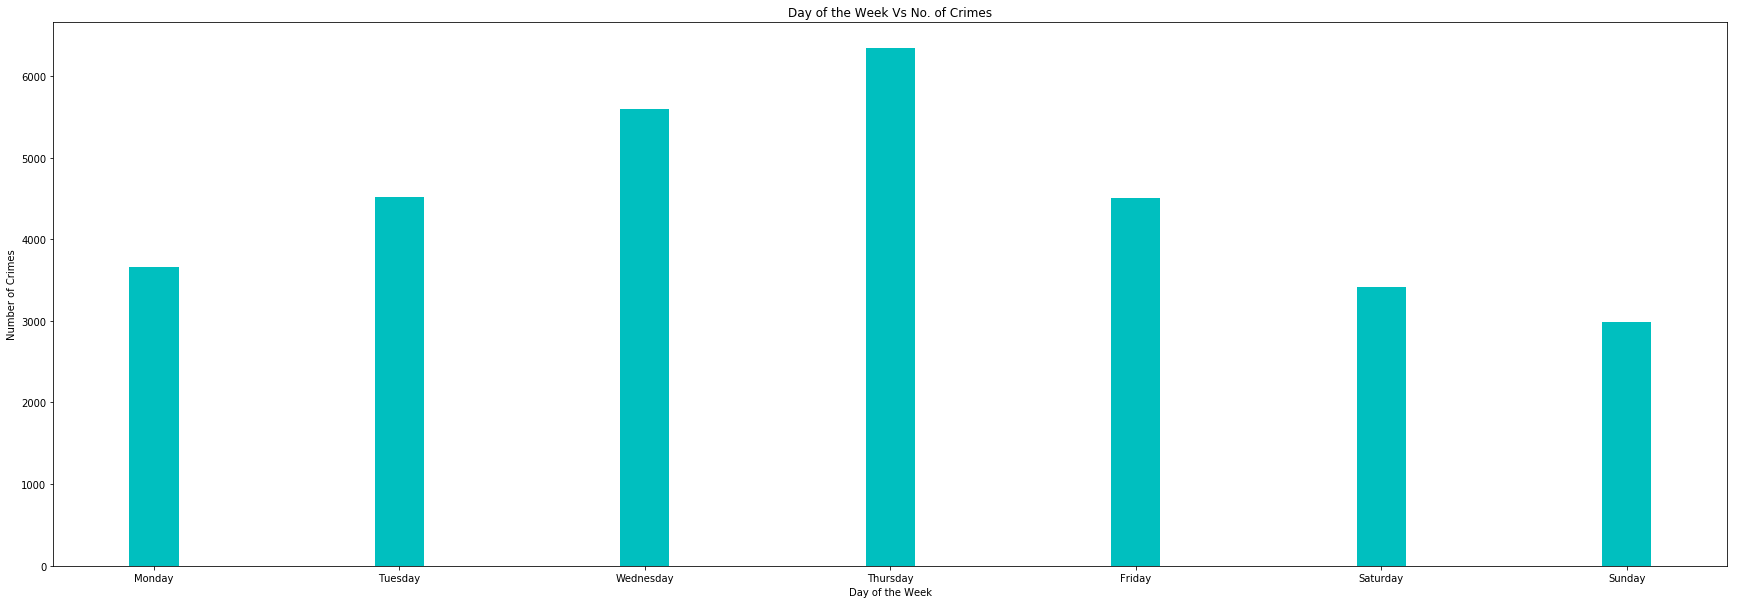

In [12]:
#Below is a plot for total crimes, for each day of the week. 

fig, ax = plt.subplots(figsize = (30,10))
fig.canvas.draw()
labels = ['0','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax.set_xticklabels(labels)
plt.title("Day of the Week Vs No. of Crimes")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.bar(groupsWeekday.index, groupsWeekday.Crime_Family1,width=0.2,color='c',align='center');

#We then checked individual crimes by Day of the week to see if there was any correlation. Three crimes stood out as having a clear difference - Obstructing Governmental Operations, Disorderly Conduct and Theft. The plots are below -

## Checking Stationarity

In [23]:
def stationarity_test(timeseries,values):
    
    #Determing the rolling statistics for a month for the data 
    rollingmean = timeseries.rolling(window=30,center=True).mean()
    rollingstd = timeseries.rolling(window=30,center=True).std()
    
    #Plotting the rolling statistics
    orig = plt.plot(timeseries, color='c',label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for the Time Series')
    plt.show(block=True)
    
    #Performing the Dickey-Fuller test:
    print('Results of the Dickey-Fuller Test:')
    dftest = adfuller(values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','P-value','No. of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

# The Dickey Fuller test code has been referenced from https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

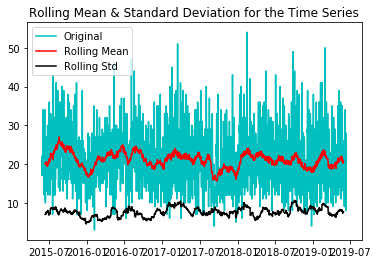

Results of the Dickey-Fuller Test:
Test Statistics                  -5.384357
P-value                           0.000004
No. of Lags Used                 23.000000
Number of Observations Used    1452.000000
Critical Value (1%)              -3.434862
Critical Value (5%)              -2.863533
Critical Value (10%)             -2.567831
dtype: float64


In [24]:
from statsmodels.tsa.stattools import adfuller

stationarity_test(groups1,groups1.Crime_Family1)